### Importing necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ETL:

## 1 - Export:

In [3]:
df1 = pd.read_csv("application_record.csv")
df2 = pd.read_csv("credit_record.csv")

## 2 - Transform and EDA

In [4]:
df1.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0


### Adding Age in years and employment in months columns
#### The addition of employment month is due to new employees can apply for a credit card using their employment as a reference point.

In [5]:
df1["AGE"] = df1["DAYS_BIRTH"].abs()/365
df1["MONTHS_EMPLOYED"] = df1["DAYS_EMPLOYED"].abs()/30
df1.drop(["DAYS_BIRTH","DAYS_EMPLOYED"],axis = 1,inplace=True) 

In [6]:
df1.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,AGE,MONTHS_EMPLOYED
count,4.385570e+05,438557.000000,4.385570e+05,438557.0,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6.022176e+06,0.427390,1.875243e+05,1.0,0.206133,0.287771,0.108207,2.194465,43.829876,2163.622679
std,5.716370e+05,0.724882,1.100869e+05,0.0,0.404527,0.452724,0.310642,0.897207,11.465836,4559.644596
min,5.008804e+06,0.000000,2.610000e+04,1.0,0.000000,0.000000,0.000000,1.000000,20.517808,0.400000
25%,5.609375e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,34.284932,36.433333
50%,6.047745e+06,0.000000,1.607805e+05,1.0,0.000000,0.000000,0.000000,2.000000,42.821918,83.766667
75%,6.456971e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,53.378082,194.966667
max,7.999952e+06,19.000000,6.750000e+06,1.0,1.000000,1.000000,1.000000,20.000000,69.043836,12174.766667


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  FLAG_MOBIL           438557 non-null  int64  
 11  FLAG_WORK_PHONE      438557 non-null  int64  
 12  FLAG_PHONE           438557 non-null  int64  
 13  FLAG_EMAIL           438557 non-null  int64  
 14  OCCUPATION_TYPE      304354 non-null  object 
 15  CNT_FAM_MEMBERS  

### It appears that data doesn't contain null values, except on the OCCUPATION_TYPE column

In [8]:
len(df1["OCCUPATION_TYPE"].unique())

19

### Filling the missing values with random choices.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Laborers'),
  Text(1, 0, 'Core staff'),
  Text(2, 0, 'Sales staff'),
  Text(3, 0, 'Managers'),
  Text(4, 0, 'Drivers'),
  Text(5, 0, 'High skill tech staff'),
  Text(6, 0, 'Accountants'),
  Text(7, 0, 'Medicine staff'),
  Text(8, 0, 'Cooking staff'),
  Text(9, 0, 'Security staff'),
  Text(10, 0, 'Cleaning staff'),
  Text(11, 0, 'Private service staff'),
  Text(12, 0, 'Low-skill Laborers'),
  Text(13, 0, 'Secretaries'),
  Text(14, 0, 'Waiters/barmen staff'),
  Text(15, 0, 'Realty agents'),
  Text(16, 0, 'HR staff'),
  Text(17, 0, 'IT staff')])

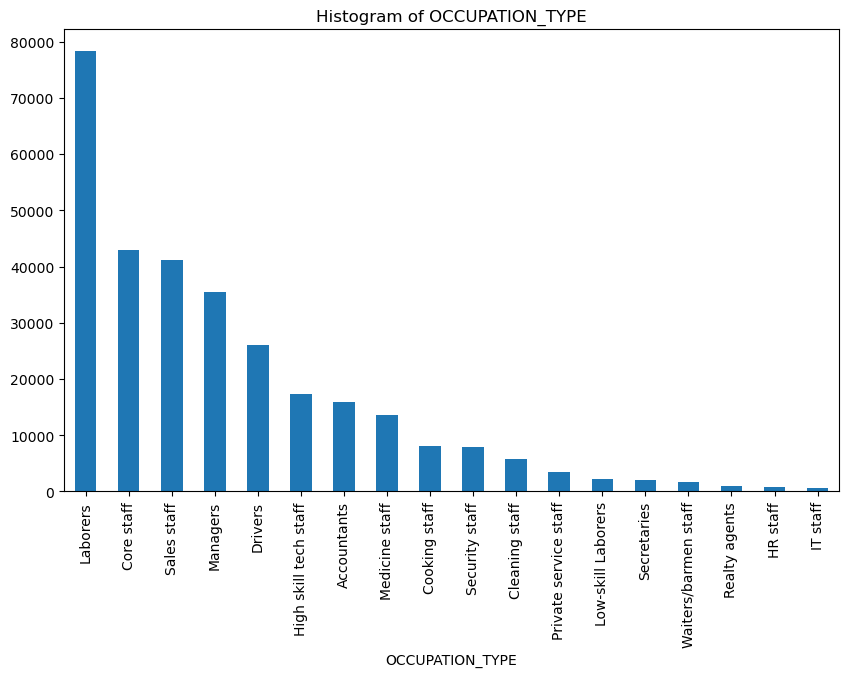

In [9]:

before_fill = df1["OCCUPATION_TYPE"].value_counts(normalize=True)

value_counts = df1["OCCUPATION_TYPE"].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar')
plt.title('Histogram of OCCUPATION_TYPE')
plt.xticks(rotation=90)

In [10]:
np.random.seed(42)
null_indices = df1["OCCUPATION_TYPE"].isnull()
null_count = null_indices.sum()
fill_values = np.random.choice(df1["OCCUPATION_TYPE"].dropna(),size=null_count, replace=False)
df1.loc[null_indices, "OCCUPATION_TYPE"] = fill_values

after_fill = df1["OCCUPATION_TYPE"].value_counts(normalize=True)

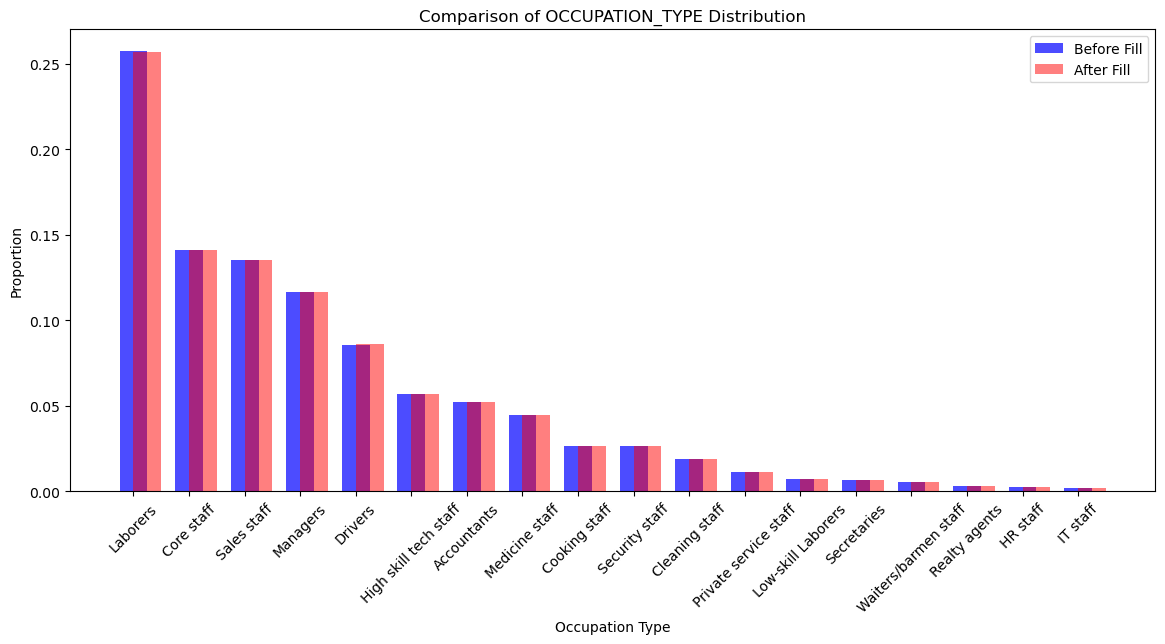

In [11]:
plt.figure(figsize=(14, 6))


plt.bar(before_fill.index, before_fill.values, alpha=0.7,width=0.5, label='Before Fill', color='blue')
plt.bar(after_fill.index, after_fill.values, alpha=0.5,width=0.5, label='After Fill', color='red',align='edge')
plt.xticks(rotation=45)
plt.title("Comparison of OCCUPATION_TYPE Distribution")
plt.xlabel("Occupation Type")
plt.ylabel("Proportion")
plt.legend()

### This graph shows that we kept the distribution of the data even after filling the missing data

### Investigate Duplicates

In [12]:
df1 = df1.drop_duplicates(subset='ID').reset_index(drop=True)
df2 = df2.loc[df2[['ID',"MONTHS_BALANCE"]].drop_duplicates().index]

In [13]:
df2.head(2)

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0


In [14]:
df2["MONTHS_BALANCE"].unique()

array([  0,  -1,  -2,  -3,  -4,  -5,  -6,  -7,  -8,  -9, -10, -11, -12,
       -13, -14, -15, -16, -17, -18, -19, -20, -21, -22, -23, -24, -25,
       -26, -27, -28, -29, -30, -31, -32, -33, -34, -35, -36, -37, -38,
       -39, -40, -41, -42, -43, -44, -45, -46, -47, -48, -49, -50, -51,
       -52, -53, -54, -55, -56, -57, -58, -59, -60], dtype=int64)

In [15]:
len(df2["ID"].unique()),len(df2)

(45985, 1048575)

Text(0, 0.5, 'Frequency of IDs')

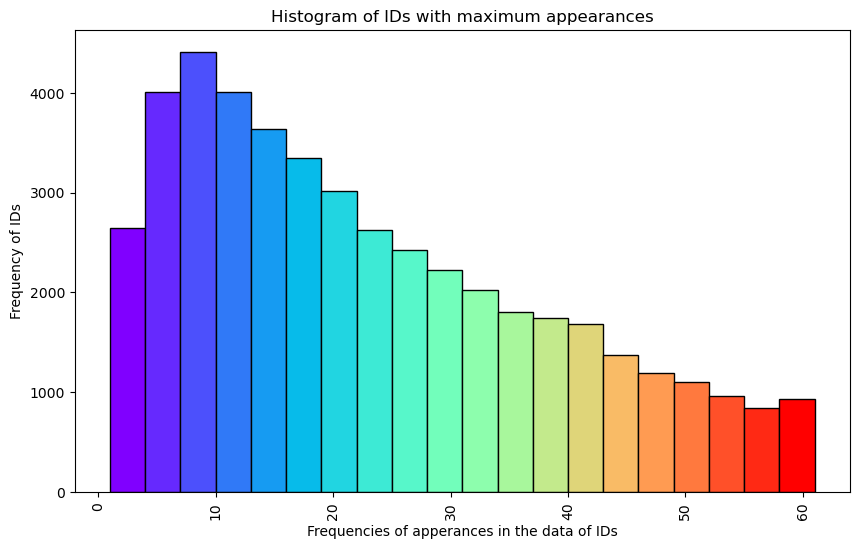

In [31]:
value_counts = df2["ID"].value_counts()
plt.figure(figsize=(10, 6))

plt.title('Histogram of IDs with maximum appearances')
plt.xticks(rotation=90)

counts, bin_edges, patches = plt.hist(value_counts, bins=20, edgecolor='black')
colors = plt.cm.rainbow(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
    
plt.xlabel('Frequencies of apperances in the data of IDs')
plt.ylabel('Frequency of IDs')

### So it appears that we have multiple data of the same people but with different extracted dates. this suggests time data to take into account, and also suggests that in prediction we can only use the data of the 45K person available, since we don't have other target data.
### Ignoring the time data migh not be a good decision since the mode of the ID repeatition centers around 10 months. But at the same time it might be hard to implement.
### We could use numerical count of Bad, Good scores, but this would ignore the time data of it.

### Gender based graphs:

Text(0.5, 1.0, 'Distribution of CODE_GENDER')

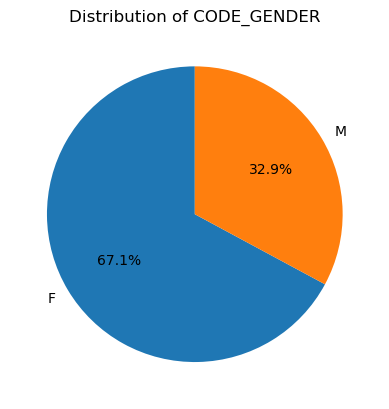

In [17]:
value_counts = df1["CODE_GENDER"].value_counts()
plt.pie(value_counts,labels=value_counts.index,startangle=90,autopct='%1.1f%%')
plt.title("Distribution of CODE_GENDER")

<Axes: xlabel='CODE_GENDER'>

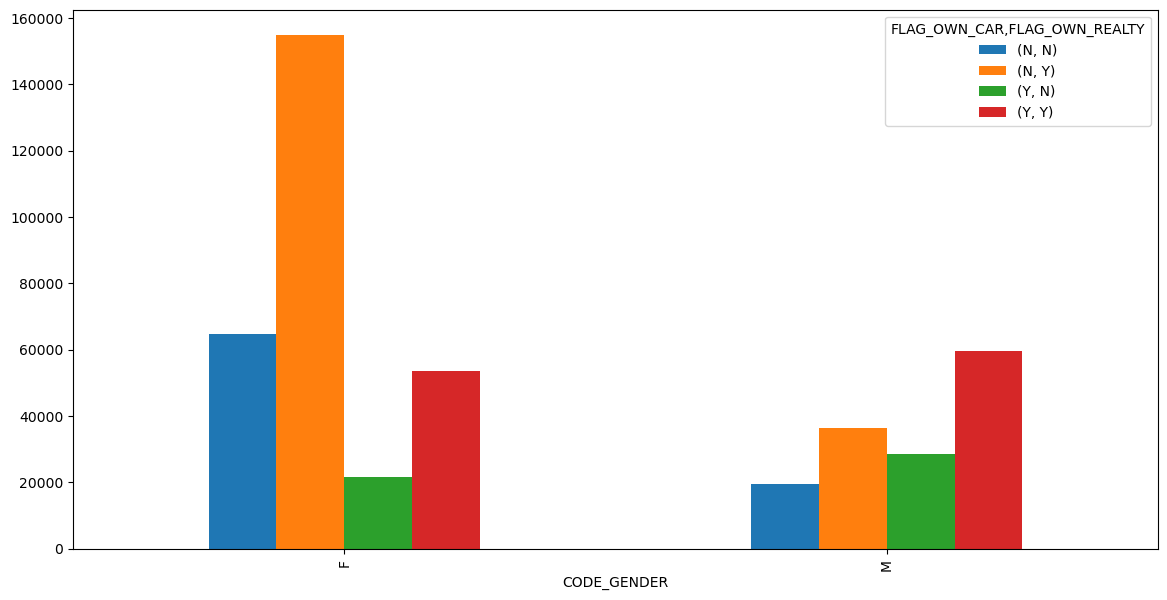

In [18]:
result = pd.DataFrame(df1.groupby('CODE_GENDER')[["FLAG_OWN_CAR","FLAG_OWN_REALTY"]].value_counts())
pivot_df = result.pivot_table(index='CODE_GENDER', columns=['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 7))

Text(0.5, 1.0, 'Comparison based on gender for number of family members')

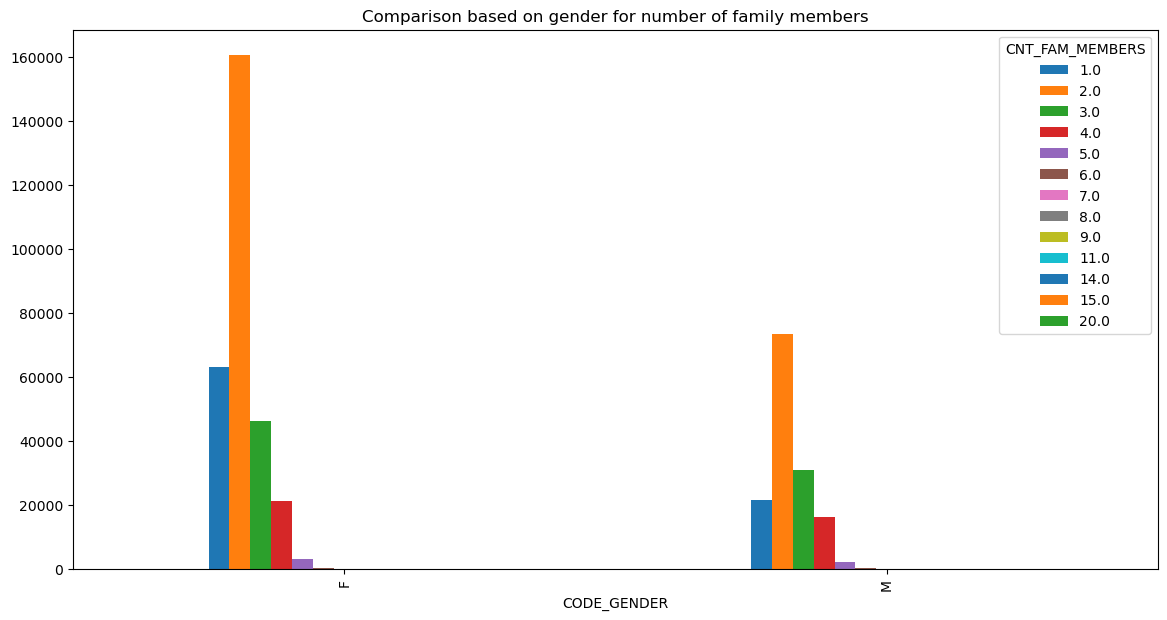

In [32]:
result = pd.DataFrame(df1.groupby('CODE_GENDER')[["CNT_FAM_MEMBERS"]].value_counts())
pivot_df = result.pivot_table(index='CODE_GENDER', columns=['CNT_FAM_MEMBERS'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 7))
plt.title("Comparison based on gender for number of family members")

In [107]:
### Income based graphs

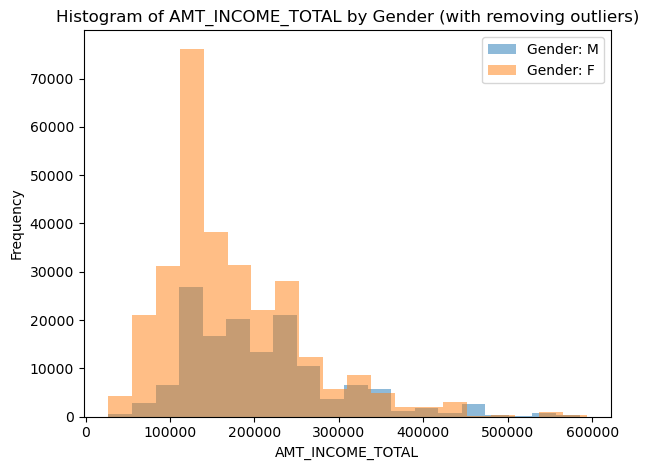

In [106]:
for gender in df1['CODE_GENDER'].unique():
    subset = df1[df1['CODE_GENDER'] == gender]
    plt.hist(subset['AMT_INCOME_TOTAL'][subset['AMT_INCOME_TOTAL']<0.6e6], bins=20, alpha=0.5, label=f'Gender: {gender}')

# Add titles and labels

plt.title('Histogram of AMT_INCOME_TOTAL by Gender (with removing outliers)')
plt.xlabel('AMT_INCOME_TOTAL')
plt.ylabel('Frequency')
plt.legend()
plt.tight_layout()

Text(0.5, 1.0, 'Histogram of Income')

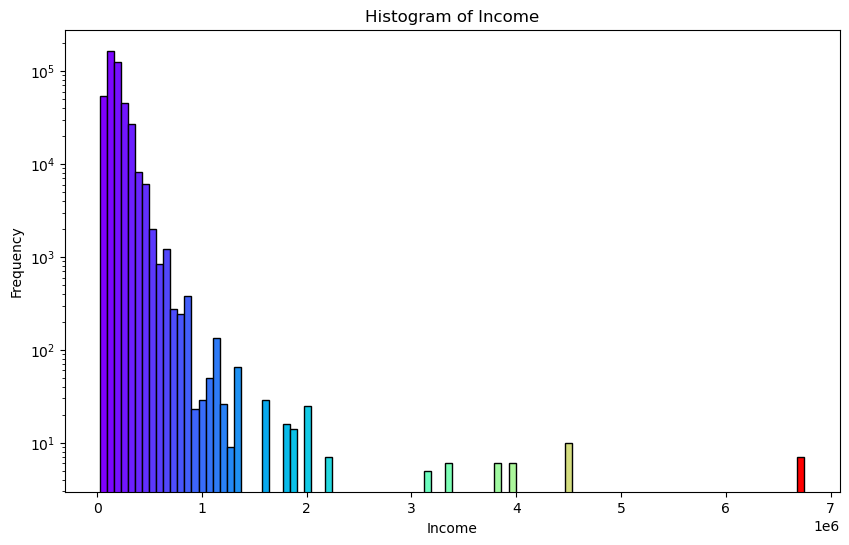

In [47]:
plt.figure(figsize=(10, 6))

#plt.xscale('log')
counts, bin_edges, patches = plt.hist(df1["AMT_INCOME_TOTAL"], bins=100, edgecolor='black')
colors = plt.cm.rainbow(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
plt.yscale('log')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.title('Histogram of Income')

### Comparison between education type and income type 

<Axes: xlabel='NAME_EDUCATION_TYPE'>

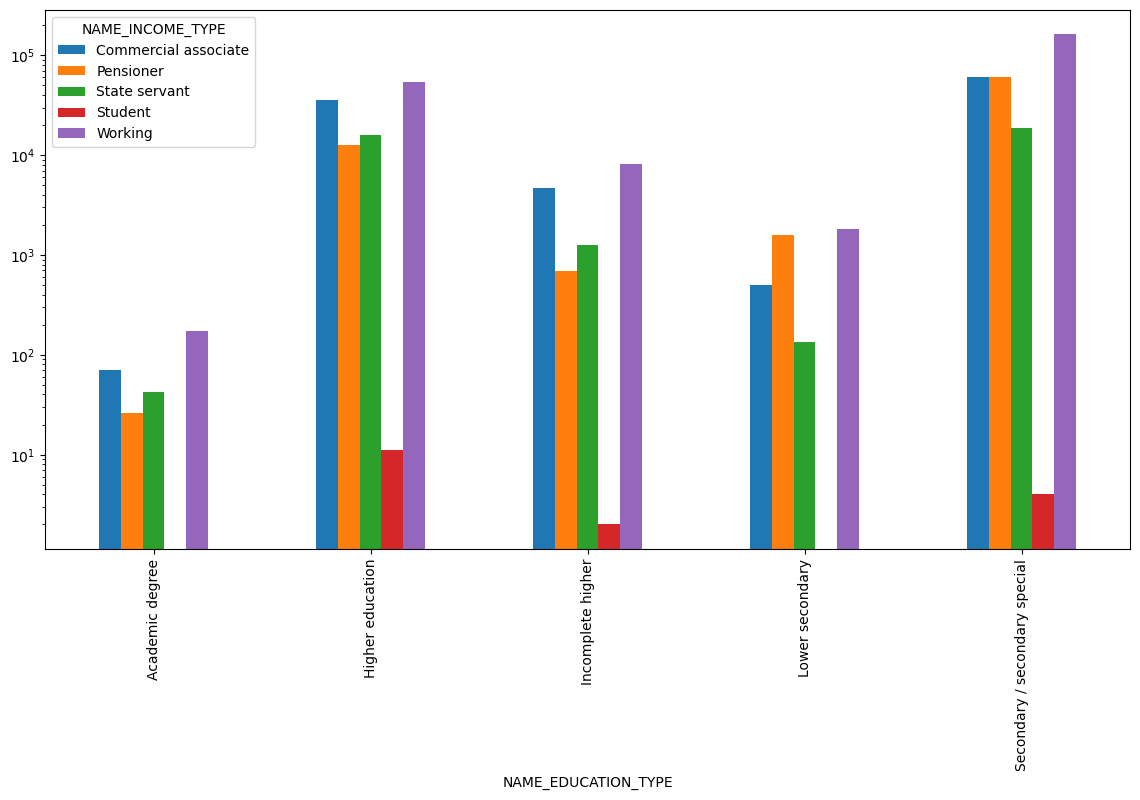

In [21]:
result = pd.DataFrame(df1.groupby('NAME_EDUCATION_TYPE')[["NAME_INCOME_TYPE"]].value_counts())
pivot_df = result.pivot_table(index='NAME_EDUCATION_TYPE', columns=['NAME_INCOME_TYPE'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 7),logy = True)

### comparison for family status and number of childern

Text(0.5, 1.0, 'Number of children for each family status')

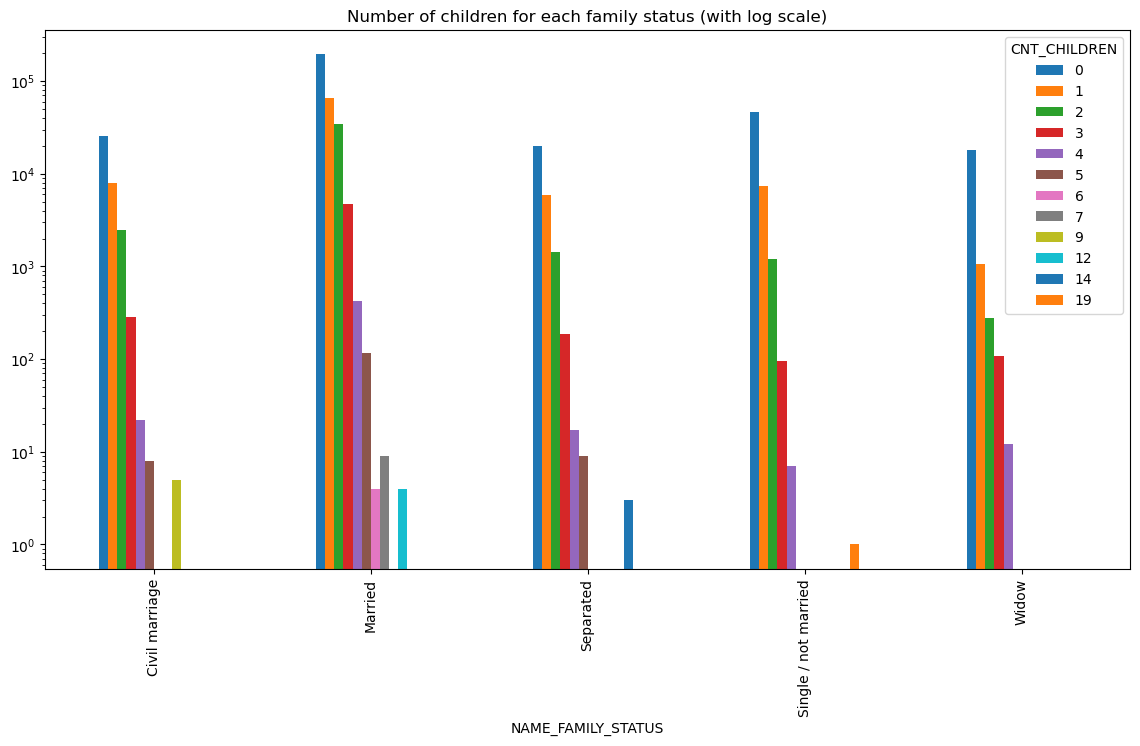

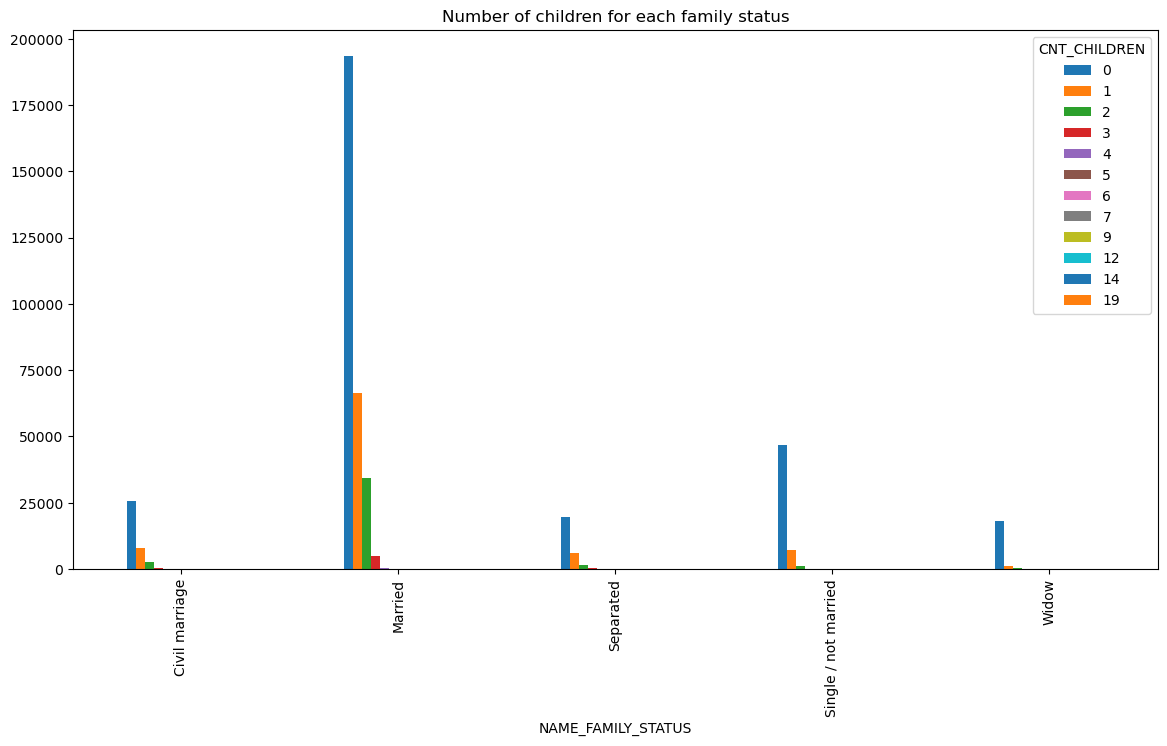

In [50]:
result = pd.DataFrame(df1.groupby('NAME_FAMILY_STATUS')[["CNT_CHILDREN"]].value_counts())
pivot_df = result.pivot_table(index='NAME_FAMILY_STATUS', columns=['CNT_CHILDREN'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 7),logy=True)
plt.subplot()
plt.title("Number of children for each family status (with log scale)")
pivot_df = result.pivot_table(index='NAME_FAMILY_STATUS', columns=['CNT_CHILDREN'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 7),logy=False)
plt.subplot()
plt.title("Number of children for each family status")


### A histogram of AGE

Text(0.5, 1.0, 'Histogram of AGE')

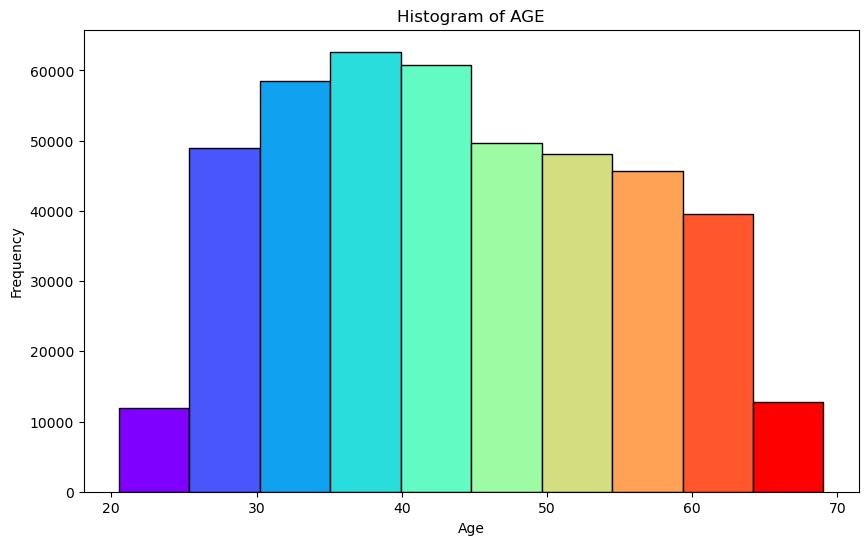

In [109]:
plt.figure(figsize=(10, 6))
counts, bin_edges, patches = plt.hist(df1["AGE"], bins=10, edgecolor='black')
colors = plt.cm.rainbow(np.linspace(0, 1, len(patches)))
for patch, color in zip(patches, colors):
    patch.set_facecolor(color)
    
plt.title('Histogram of AGE with Color Spectrum')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of AGE')

### Credit score based graphs

Text(0.5, 1.0, 'Credit Score Status')

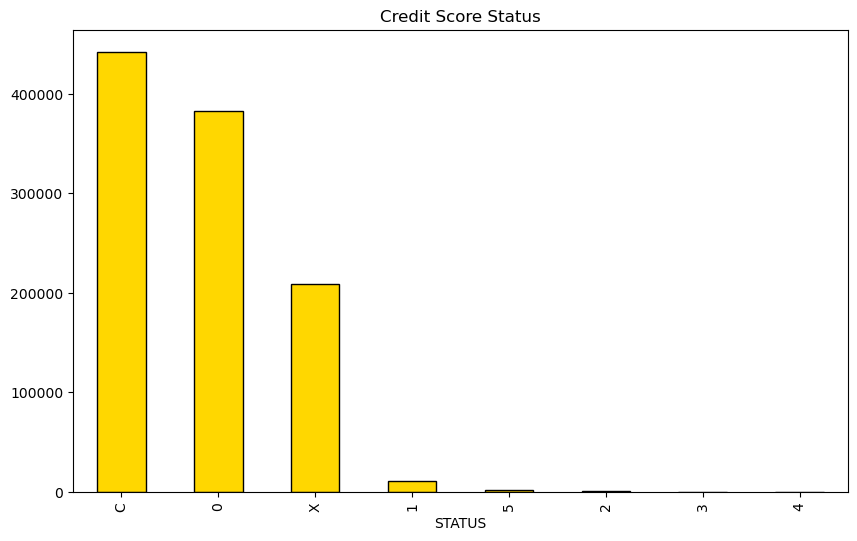

In [53]:
value_counts = df2["STATUS"].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar',color = "gold",edgecolor='black')
plt.title('STATUS RECORDS')
plt.xticks(rotation=90)
plt.title("Credit Score Status")

### As of Egyptian credit score goes, an interest starts to add on the credit after 55 days if not paid in time, So I decided to label 3 months and above bad candidates for credit

In [54]:
df2["STATUS"][df2["STATUS"] == 'C'] = 1
df2["STATUS"][df2["STATUS"] == 'X'] = 1
df2["STATUS"] = df2["STATUS"].astype(int)
df2["STATUS"][df2["STATUS"]>=2] = 0

C:\Users\ahmad\AppData\Local\Temp\ipykernel_5612\3392877970.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df2["STATUS"][df2["STATUS"] == 'C'] = 1
C:\Users\ahmad\AppData\Local\Temp\ipykernel_5612\3392877970.py:1: SettingWithCopyWarning:

Text(0.5, 1.0, 'Credit Score Status')

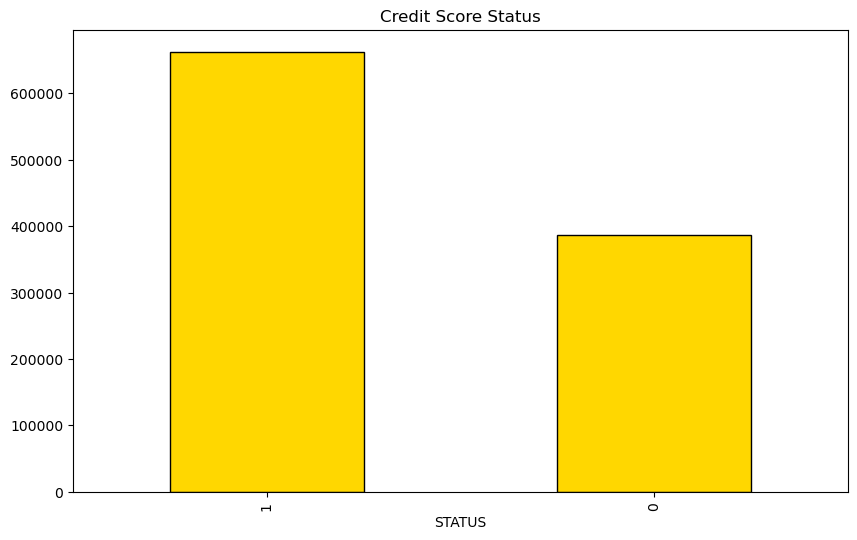

In [55]:
value_counts = df2["STATUS"].value_counts()
plt.figure(figsize=(10, 6))
value_counts.plot(kind='bar',color = "gold",edgecolor='black')
plt.title('STATUS RECORDS')
plt.xticks(rotation=90)
plt.title("Credit Score Status")

In [ ]:
df2.tail()

,ID,MONTHS_BALANCE,STATUS
1048570,5150487,-25,1
1048571,5150487,-26,1
1048572,5150487,-27,1
1048573,5150487,-28,1
1048574,5150487,-29,1


### Due to the sequential nature of the data, I decided to track changes of status as in changes from good status to bad status or vice versa. with taking into account the most recent status

In [57]:
credit_history_df = df2.sort_values(by=['ID', 'MONTHS_BALANCE']).reset_index(drop=True)
credit_history_df['status_change'] = 0
credit_history_df['status_change'] += credit_history_df.groupby('ID')['STATUS'].diff().fillna(0)
credit_history_df['good_to_bad'] = (credit_history_df['status_change'] == 1).astype(int)
credit_history_df['bad_to_good'] = (credit_history_df['status_change'] == -1).astype(int)

credit_summary = credit_history_df.groupby('ID').agg(
    good_to_bad_changes=('good_to_bad', 'sum'),
    bad_to_good_changes=('bad_to_good', 'sum'),
    current_status=('STATUS', 'last')  ,
    ).reset_index()


<Axes: title={'center': 'Credit score with credit history changes (bad score to good score)'}, xlabel='current_status'>

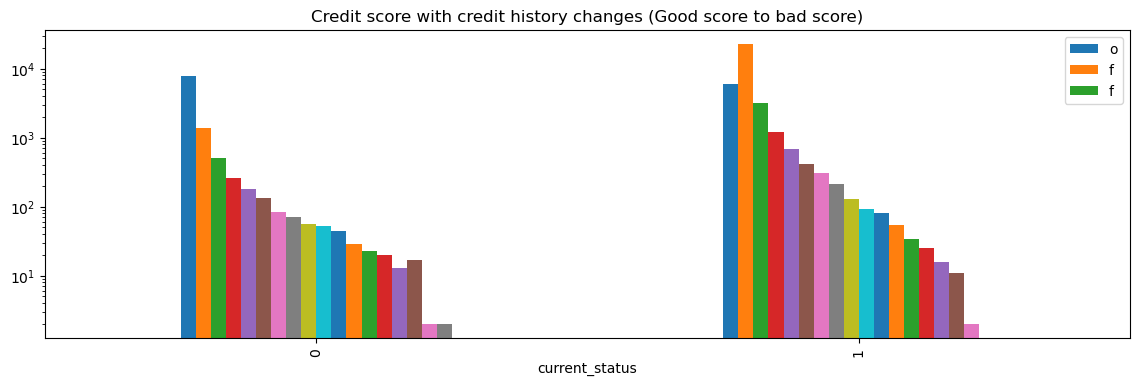

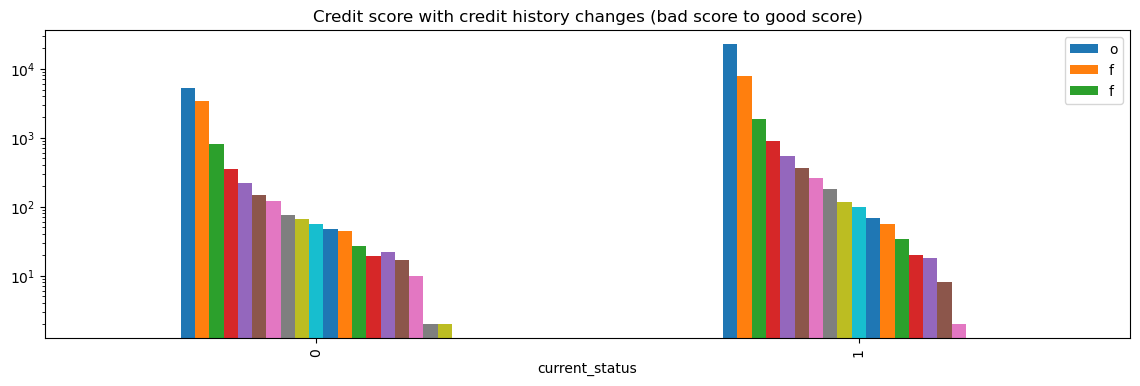

In [80]:
result = pd.DataFrame(credit_summary.groupby('current_status')[["good_to_bad_changes"]].value_counts())
pivot_df = result.pivot_table(index='current_status', columns=['good_to_bad_changes'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 4),logy=True)
plt.legend('off')
plt.title("Credit score with credit history changes (Good score to bad score)")
plt.subplot()
result = pd.DataFrame(credit_summary.groupby('current_status')[["bad_to_good_changes"]].value_counts())
pivot_df = result.pivot_table(index='current_status', columns=['bad_to_good_changes'], values='count', aggfunc='sum').fillna(0)
pivot_df.plot(kind='bar', figsize=(14, 4),logy=True)
plt.legend('off')
plt.title("Credit score with credit history changes (bad score to good score)")
plt.subplot()

In [81]:
num_ids_in_credit_summary = credit_summary['ID'].nunique()
num_ids_in_df1 = df1['ID'].nunique()
ids_in_credit_summary_not_in_df1 = set(credit_summary['ID']) - set(df1['ID'])
ids_in_df1_not_in_credit_summary = set(df1['ID']) - set(credit_summary['ID'])
len(ids_in_credit_summary_not_in_df1),len(ids_in_df1_not_in_credit_summary),len(credit_summary)-len(ids_in_credit_summary_not_in_df1)


(9528, 402053, 36457)

### Having only 36k data to work with, instead of the original 500k in the application_record or the the 45k in the credit_record is problematic, as we can't make use of the full dataset. But we will work with what we have none the less.

In [82]:
df = pd.merge(credit_summary, df1, on='ID', how='inner')
df["APPROVAL"] = np.logical_or(df['good_to_bad_changes'] > df['bad_to_good_changes'],df['current_status'])
df["CONTACTS"] = df[["FLAG_MOBIL", "FLAG_WORK_PHONE",	"FLAG_PHONE", "FLAG_EMAIL"]].astype(str).sum(axis = 1)

In [ ]:
df.to_csv("data.csv")
df = pd.read_csv('data.csv')

In [ ]:
df = df.drop(["ID","Unnamed: 0","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis = 1)
print(df.duplicated().sum())
print(df[['APPROVAL']].value_counts())

12683
APPROVAL
True        27895
False        8562
Name: count, dtype: int64


### The data is imbalanced, a weighted random sampling approach is used to balance the data.

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Labeling categorical columns
categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY' ,'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','CONTACTS']
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df["APPROVAL"] = df["APPROVAL"].astype(int)
df.head(2)

,good_to_bad_changes,bad_to_good_changes,current_status,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,AGE,MONTHS_EMPLOYED,APPROVAL,CONTACTS
0,1,1,1,1,1,1,0,427500.0,4,1,0,4,14,2.0,32.890411,151.4,1,4
1,1,1,1,1,1,1,0,427500.0,4,1,0,4,8,2.0,32.890411,151.4,1,4


<Axes: >

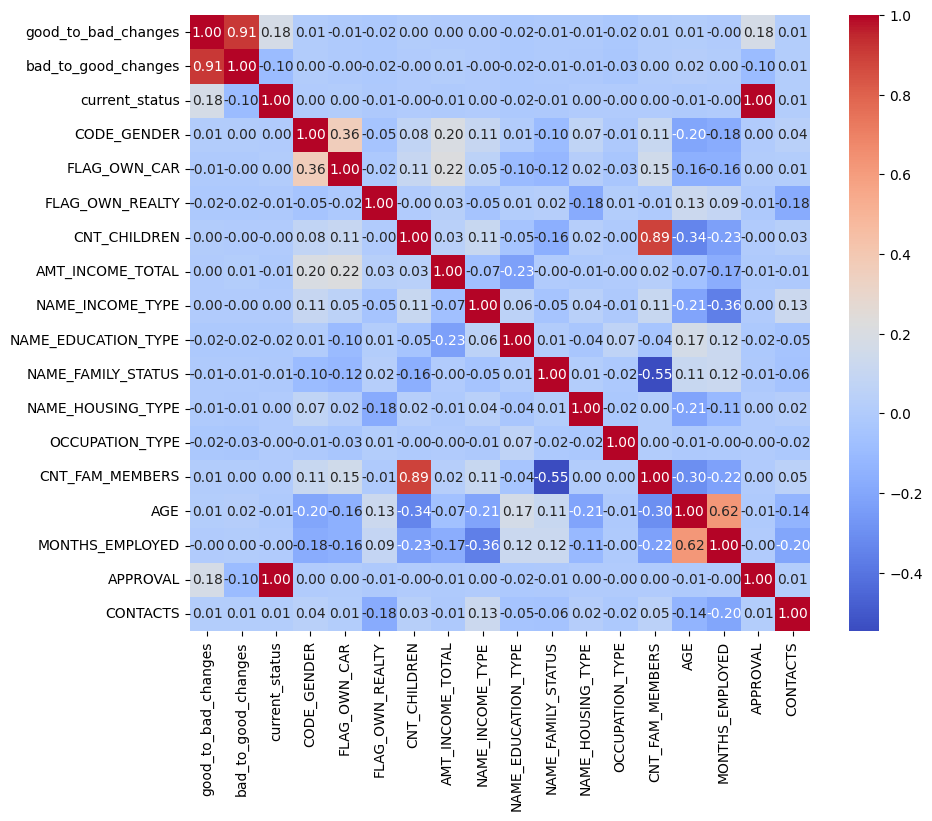

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# A correlation matrix to have an intuition of how correlated are correlated

correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler


# I removed 'current_status' columns since they have a powerful indication to the models
X = df.drop(['APPROVAL','current_status'], axis = 1)
Y = df['APPROVAL']
# Using random sampler so we have a balanced data
oversampler = RandomOverSampler(random_state=42)
X, Y = oversampler.fit_resample(X, Y)
# Normalizing the data for the models
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# Splitting the data for testing later
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42,stratify=Y)

In [ ]:
scores_models = {}

# 3 - Training models / Load

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

best = 0
k = 0
for i in range(1, 10):
    clf = DecisionTreeClassifier(max_depth=i)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(i,'\t',score)
    if score > best:
        best = score
        k = i
print("Best model is with depth",k,'\t',best)

clf = DecisionTreeClassifier(max_depth=k)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models['DT_score'] = scores.mean()

1 	 0.7941640378548895
2 	 0.8264267278462862
3 	 0.8264267278462862
4 	 0.8384714654430743
5 	 0.8384714654430743
6 	 0.8472899340407227
7 	 0.8482219673071408
8 	 0.8541726412388873
9 	 0.8556782334384858
Best model is with depth 9 	 0.8556782334384858
[0.86027962 0.85427496 0.85777021 0.83814304 0.85077971]


## Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models["LR_score"] = scores.mean()

[0.80776125 0.81188385 0.80820936 0.7886718  0.81797813]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models["RF_score"] = scores.mean()

[0.91019896 0.89576985 0.90634522 0.89738304 0.9111848 ]


## Gaussuan Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models["NB_score"] = scores.mean()

[0.55215989 0.58048037 0.54436279 0.50349525 0.53844775]


## K Neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train, Y_train)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models["KNN_score"] = scores.mean()

[0.65934755 0.64025811 0.65907869 0.66535221 0.66167772]


## Support vector machine Classifier

In [ ]:
from sklearn.svm import SVC

svm_model = SVC()
svm_model.fit(X_train, Y_train)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models["SVC_score"] = scores.mean()

[0.65934755 0.64025811 0.65907869 0.66535221 0.66167772]


## XGBoost

In [ ]:
import xgboost as xgb

best = 0
k = 0
for i in range(1, 20):
    clf = xgb.XGBClassifier(max_depth = i)
    clf.fit(X_train, Y_train)
    score = clf.score(X_test, Y_test)
    print(i,'\t',score)
    if score > best:
        best = score
        k = i
print("Best model is with depth",k,'\t',best)

clf = xgb.XGBClassifier(max_depth=k)
scores = cross_val_score(clf, X, Y, cv=5)
print(scores)
scores_models['DT_score'] = scores.mean()

1 	 0.8472182391740751
2 	 0.8610553484370519
3 	 0.8652853455692573
4 	 0.8751792371666188
5 	 0.8876541439632922
6 	 0.8996271866934328
7 	 0.9151132778893031
8 	 0.9244336105534844
9 	 0.9356897046171494
10 	 0.9397763120160596
11 	 0.9435761399483797
12 	 0.9455119013478634
13 	 0.9469457986808144
14 	 0.9480929165471752
15 	 0.948451390880413
16 	 0.9470891884141095
17 	 0.9475193576139949
18 	 0.9473042730140522
19 	 0.9480929165471752
Best model is with depth 15 	 0.948451390880413
[0.91889227 0.90661409 0.91459043 0.90258111 0.9169206 ]


# Dense Neural Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_path = 'best_model_128_128.keras'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=0)
early_stopping = EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    )


df = pd.read_csv('data.csv')
df = df.drop(["ID","Unnamed: 0","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis = 1)
cols_to_convery = ["good_to_bad_changes","bad_to_good_changes","current_status",
                   "CNT_CHILDREN","APPROVAL","CONTACTS","AMT_INCOME_TOTAL",
                   "CNT_FAM_MEMBERS","AGE","MONTHS_EMPLOYED"]
df[cols_to_convery] = df[cols_to_convery].astype(np.float32)

categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY' ,'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','CONTACTS']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

    
X = df.drop(['APPROVAL','current_status'], axis = 1)
Y = df['APPROVAL']
oversampler = RandomOverSampler(random_state=42)
X, Y = oversampler.fit_resample(X, Y)
X = X.astype(np.float32)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

Y = Y.astype(np.float32)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42,stratify=Y)
model = tf.keras.Sequential(
    [
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

print(model.summary())
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test),callbacks = [checkpoint_callback, early_stopping])

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               6656      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 129       
                                                                 
Total params: 23,297
Trainable params: 23,297
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
1308/1308 [======================

In [ ]:
# I trained the model in another Notebook and used the weights
model.load_weights("best_model_128_128.keras")
scores_models['NN_128_128_score'] = model.evaluate(X_test,Y_test)[1]

436/436 [==============================] - 2s 4ms/step - loss: 0.2634 - accuracy: 0.8780


In [ ]:
checkpoint_path = 'best_model_128_128_128.keras'
checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose=0)

model = tf.keras.Sequential(
    [
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ]
)
model.compile(loss = 'binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy'])

print(model.summary())
model.fit(X_train, Y_train, epochs=100, validation_data=(X_test, Y_test),callbacks = [checkpoint_callback, early_stopping])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 128)               6656      
                                                                 
 dropout_11 (Dropout)        (None, 128)               0         
                                                                 
 dense_17 (Dense)            (None, 128)               16512     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dropout_13 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 1)                

In [ ]:
# I trained the model in another Notebook and used the weights
model.load_weights("best_model_128_128_128.keras")
scores_models['NN_128_128_128_score'] = model.evaluate(X_test,Y_test)[1]

436/436 [==============================] - 2s 4ms/step - loss: 0.2445 - accuracy: 0.8885


## Tabular Transformer
from the paper "TabTransformer: Tabular Data Modeling Using Contextual Embeddings"

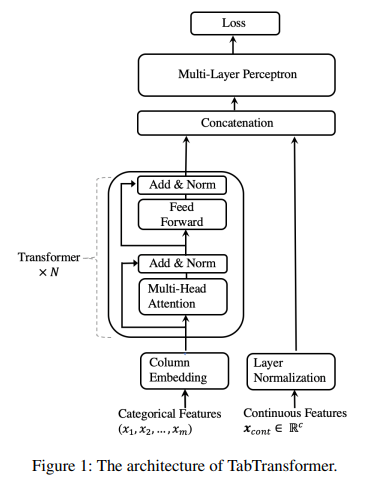

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder


# Importing the data
df = pd.read_csv('data.csv')
# dropping unnecessary columns
df = df.drop(["ID","Unnamed: 0","FLAG_MOBIL","FLAG_WORK_PHONE","FLAG_PHONE","FLAG_EMAIL"],axis = 1)
# seleceting columns for encoding
categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY' ,'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','CONTACTS']
numerical_columns = ['good_to_bad_changes', 'bad_to_good_changes', 'current_status', 'CNT_CHILDREN',
                     'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE', 'MONTHS_EMPLOYED']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df["APPROVAL"] = df["APPROVAL"].astype(int)

# Assigning labels to Y
Y = df['APPROVAL']

# Sellecting columns for training
numerical_columns = ['good_to_bad_changes', 'bad_to_good_changes', 'CNT_CHILDREN',
                     'AMT_INCOME_TOTAL', 'CNT_FAM_MEMBERS', 'AGE', 'MONTHS_EMPLOYED']
categorical_columns = ['CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY' ,'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
                       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE','CONTACTS']
oversampler = RandomOverSampler(random_state=42)
df, Y = oversampler.fit_resample(df, Y)

# I removed 'current_status' columns since they have a powerful indication to the models
X_cat = df[categorical_columns]
X_con = df[numerical_columns]

# Normalizing the data
scaler = MinMaxScaler()
X_con = scaler.fit_transform(X_con)

# I had to put Y twice to use stratify
X_train_cat, X_test_cat, Y_train, Y_test = train_test_split(X_cat, Y, test_size = 0.25, random_state = 42 , stratify=Y)
X_train_con, X_test_con, Y_train, Y_test = train_test_split(X_con, Y, test_size = 0.25, random_state = 42 , stratify=Y)

In [ ]:
import torch
import torch.nn as nn
from tab_transformer_pytorch import TabTransformer


categories = list(df[categorical_columns].nunique().values) 



# I reduced the parameters to be suited to my 4 GB VRAM GPU
model = TabTransformer(
    categories = categories,                                # tuple containing the number of unique values within each category
    num_continuous = len(numerical_columns),                # number of continuous values
    dim = 25,                                               # dimension, paper set at 32
    dim_out = 1,                                            # binary prediction, but could be anything
    depth = 6,                                              # depth, paper recommended 6
    heads = 5,                                              # heads, paper recommends 8
    attn_dropout = 0.1,                                     # post-attention dropout
    ff_dropout = 0.1,                                       # feed forward dropout
    mlp_hidden_mults = (4, 2),                              # relative multiples of each hidden dimension of the last mlp to logits
    mlp_act = nn.ReLU(),                                    # activation for final mlp, defaults to relu, but could be anything else (selu etc)
).to('cuda')

if not isinstance(X_train_cat, torch.Tensor):
    X_train_cat = torch.tensor(X_train_cat.values, dtype=torch.int64)
if not isinstance(X_test_cat, torch.Tensor):
    X_test_cat = torch.tensor(X_test_cat.values, dtype=torch.int64)
if not isinstance(Y_test, torch.Tensor):
    Y_test = torch.tensor(Y_test.values, dtype=torch.float32)
# Transforming the data to torch tensors
X_train_cat = torch.tensor(X_train_cat, dtype=torch.int64).to('cuda')
X_train_con = torch.tensor(X_train_con, dtype=torch.float32).to('cuda')
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1, 1).to('cuda')

X_test_cat = torch.tensor(X_test_cat, dtype=torch.int64).to('cuda')
X_test_con = torch.tensor(X_test_con, dtype=torch.float32).to('cuda')
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1).to('cuda')


C:\Users\ahmad\AppData\Local\Temp\ipykernel_12812\2019441274.py:31: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_train_cat = torch.tensor(X_train_cat, dtype=torch.int64).to('cuda')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_12812\2019441274.py:35: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X_test_cat = torch.tensor(X_test_cat, dtype=torch.int64).to('cuda')
C:\Users\ahmad\AppData\Local\Temp\ipykernel_12812\2019441274.py:37: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1, 1

In [ ]:
from IPython.display import display, HTML, clear_output

def display_dataframe(df):
    """
    Displays a pandas DataFrame in a Jupyter Notebook with simple table decoration.
    """
    display(df.style.set_properties(
        **{
            'border': '1px solid black',
            'padding': '5px',
            'text-align': 'center'
        }).set_table_attributes('style="border-collapse: collapse;"'))

In [ ]:
import torch.optim as optim
criterion = nn.BCEWithLogitsLoss()
from torch.utils.data import DataLoader, TensorDataset


# Function to calculate accuracy
def calculate_accuracy(outputs, targets):
    predictions = torch.round(torch.sigmoid(outputs))
    correct = (predictions == targets).sum().item()
    accuracy = correct / targets.size(0)
    return accuracy

batch_size = 64
num_epochs = 50 # Number of epochs has to be big, discovered by trial and error

# The patience of the schedular and the learning rate was selected after multiple trials and errors
optimizer = optim.Adam(model.parameters(), lr=0.0001) 
# I added a learning rate schedular to navigate the model, set the patience to 4, with observation for accuracy and threshhold of 0.01 to make the model more stable
# Also added printing for the learning rate
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.3,patience=4, threshold = 0.01,mode = 'max') 

# Creating batches
dataset = TensorDataset(X_train_cat, X_train_con, Y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

test_dataset = TensorDataset(X_test_cat, X_test_con, Y_test)
test_dataloader =  DataLoader(test_dataset, batch_size=batch_size, shuffle=True)
# Those variables to save the best model
best_model_state = None
best_accuracy = 0.0
history = pd.DataFrame(columns = ['Epoch', 'Loss', 'Accuracy', 'Test Loss', 'Test Accuracy', 'Next Learning rate'])

for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0
    epoch_accuracy = 0.0
    total_samples = 0
    
    # Batch handling
    for batch in dataloader:
        X_batch_cat, X_batch_con, Y_batch = batch

        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_batch_cat, X_batch_con)
        loss = criterion(outputs, Y_batch)

        # Backward pass
        loss.backward()
        optimizer.step()
        # Accumulate loss and accuracy
        batch_size = Y_batch.size(0)
        epoch_loss += loss.item() * batch_size
        epoch_accuracy += calculate_accuracy(outputs, Y_batch) * batch_size
        total_samples += batch_size

    
    
    
    epoch_loss /= total_samples
    epoch_accuracy /= total_samples
    
    
    
    
    # Test evaluation
    model.eval()
    test_loss = 0.0
    test_accuracy = 0.0
    test_samples = 0
    with torch.no_grad():
        for batch in test_dataloader:
            X_test_cat, X_test_con, Y_test = batch

            # Forward pass
            test_outputs = model(X_test_cat, X_test_con)
            loss = criterion(test_outputs, Y_test)

            # Accumulate test loss and accuracy
            batch_size = Y_test.size(0)
            test_loss += loss.item() * batch_size
            test_accuracy += calculate_accuracy(test_outputs, Y_test) * batch_size
            test_samples += batch_size
            
    test_loss /= test_samples
    test_accuracy /= test_samples     
    
    scheduler.step(test_accuracy) 
    
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model_state = model.state_dict()
        torch.save(best_model_state, 'best_model.pth')
        
    lr_printed = optimizer.param_groups[0]['lr']
    
    history.loc[epoch] = [ f'{(epoch+1)}/{num_epochs}', f'{loss.item():.4f}', f'{epoch_accuracy:.4f}', 
                                 f'{test_loss:.4f}', f'{test_accuracy:.4f}',f"{lr_printed}"]
    display_dataframe(history.tail())
    clear_output(wait=True)

,Epoch,Loss,Accuracy,Test Loss,Test Accuracy,Next Learning rate
45,46/50,0.2579,0.9111,0.2507,0.8887,7.29e-08
46,47/50,0.3066,0.9113,0.2507,0.8889,7.29e-08
47,48/50,0.3523,0.9121,0.2507,0.8889,7.29e-08
48,49/50,0.2735,0.9126,0.2507,0.8886,7.29e-08
49,50/50,0.3156,0.9107,0.2506,0.8890,7.29e-08


In [ ]:
history.to_csv("history_tt.csv")

Text(0.5, 1.0, 'Model metrics')

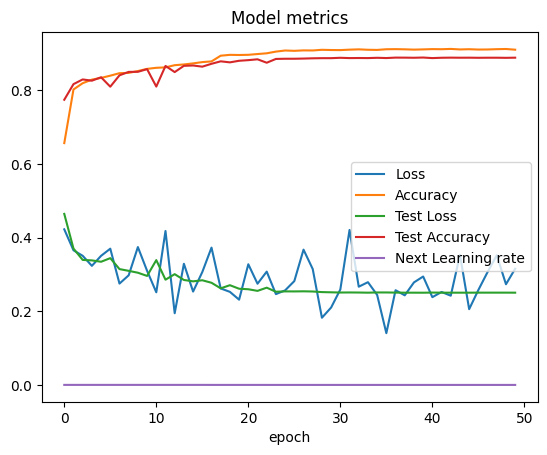

In [ ]:
import matplotlib.pyplot as plt
history.drop('Epoch',axis = 1).astype(float).plot()
plt.xlabel("epoch")
plt.title("Model metrics")

In [ ]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
with torch.no_grad():
    Y_train = torch.tensor(Y_train, dtype=torch.int64).to('cuda')
    outputs = model(X_train_cat, X_train_con)
    predictions = (outputs > 0.5).float()  
    accuracy = (predictions == Y_train).float().mean()
print(f'Accuracy on training set: {accuracy:.4f}')

In [ ]:
model.load_state_dict(torch.load('best_model.pth'))
model.eval()
test_loss = 0.0
test_accuracy = 0.0
test_samples = 0
with torch.no_grad():
    for batch in test_dataloader:
        X_test_cat, X_test_con, Y_test = batch

        # Forward pass
        test_outputs = model(X_test_cat, X_test_con)
        loss = criterion(test_outputs, Y_test)

        # Accumulate test loss and accuracy
        batch_size = Y_test.size(0)
        test_loss += loss.item() * batch_size
        test_accuracy += calculate_accuracy(test_outputs, Y_test) * batch_size
        test_samples += batch_size
            
    test_loss /= test_samples
    test_accuracy /= test_samples 
    
print(f'Accuracy on testing set: {test_accuracy:.4f}')

C:\Users\ahmad\AppData\Local\Temp\ipykernel_12812\130810382.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Accuracy on testing set: 0.8894


In [117]:
scores_models['TabTransformer'] = test_accuracy

In [118]:
scores_models

{'DT_score': 0.9119196988707653,
 'LR_score': 0.8069008782936009,
 'RF_score': 0.904176375694569,
 'NB_score': 0.5437892095357592,
 'KNN_score': 0.6571428571428571,
 'SVC_score': 0.6571428571428571,
 'NN_128_128_score': 0.877975344657898,
 'NN_128_128_128_score': 0.8885144591331482,
 'TabTransformer': 0.8894}

# Models comparison Graph

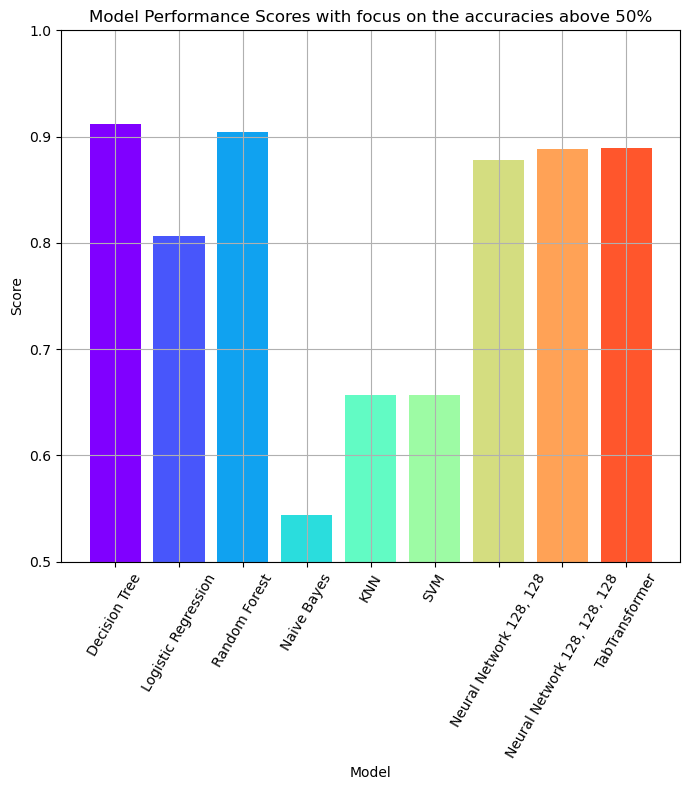

In [119]:
plt.figure(figsize=(7, 8))
plt.bar(["Decision Tree", "Logistic Regression", "Random Forest", "Naive Bayes", "KNN", "SVM", "Neural Network 128, 128", "Neural Network 128, 128, 128","TabTransformer"], 
        scores_models.values(),color=colors)
plt.xlabel('Model')
plt.ylabel('Score')
plt.xticks(rotation = 60)
plt.title('Model Performance Scores with focus on the accuracies above 50%')
plt.tight_layout()
plt.grid()
plt.ylim(0.5, 1.0)
plt.show()